contributing student: Eirik Wang Johansen, 151232

# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92**  on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [492]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [493]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

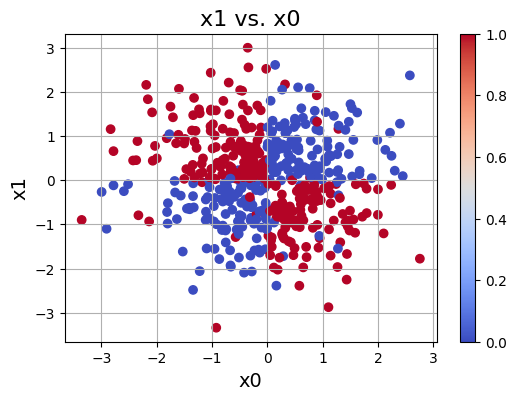

In [494]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [495]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import set_random_seed
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.keras.callbacks import LearningRateScheduler

from keras import ops
import keras

from sklearn.model_selection import train_test_split

set_random_seed(1)
enable_op_determinism()

In [496]:
y_train = train[['y']]
X_train = train.drop(columns=['y', 'split'])

y_test = test[['y']]
X_test = test.drop(columns=['y', 'split'])

In [497]:
model = Sequential()
model.add(Dense(10, activation='relu', name='layer1'))
model.add(Dense(5, activation='relu', name='layer2'))
model.add(Dense(1, activation='sigmoid', name='output'))

model(X_train)

<tf.Tensor: shape=(500, 1), dtype=float32, numpy=
array([[0.4233171 ],
       [0.50114673],
       [0.19134335],
       [0.42550743],
       [0.45561522],
       [0.48494792],
       [0.15667225],
       [0.3167569 ],
       [0.19732113],
       [0.21336482],
       [0.28766802],
       [0.5010469 ],
       [0.49196115],
       [0.31527287],
       [0.4422572 ],
       [0.31725374],
       [0.38833767],
       [0.5002922 ],
       [0.24882239],
       [0.18470049],
       [0.43998256],
       [0.50083745],
       [0.40254888],
       [0.31825268],
       [0.42992264],
       [0.23768692],
       [0.35008675],
       [0.41944596],
       [0.29256347],
       [0.46420738],
       [0.449902  ],
       [0.37698612],
       [0.2584815 ],
       [0.29074448],
       [0.3114341 ],
       [0.38423878],
       [0.3152696 ],
       [0.25320265],
       [0.42552394],
       [0.07830248],
       [0.5015726 ],
       [0.3200434 ],
       [0.28777722],
       [0.49287152],
       [0.43658122],
     

In [498]:
model.compile(
    optimizer=SGD(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [499]:
EPOCHS = 150

In [500]:
def learning_rate_scheduler(lr0, warmup_steps):
    def cosine_decay(epoch):
        if epoch < warmup_steps:
            return lr0 * (epoch + 1) / warmup_steps
        else:
            return 0.5 * lr0 * (1 + np.cos(np.pi * ((epoch - warmup_steps) / (EPOCHS - warmup_steps))))
    return cosine_decay

lr_scheduler = learning_rate_scheduler(lr0=0.1, warmup_steps=5)

In [501]:
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[LearningRateScheduler(lr_scheduler)],
    verbose=1
)

Epoch 1/150


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5875 - loss: 0.7164 - val_binary_accuracy: 0.6600 - val_loss: 0.6640 - learning_rate: 0.0200
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6475 - loss: 0.6775 - val_binary_accuracy: 0.7900 - val_loss: 0.6286 - learning_rate: 0.0400
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7300 - loss: 0.6436 - val_binary_accuracy: 0.8300 - val_loss: 0.6007 - learning_rate: 0.0600
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7575 - loss: 0.6171 - val_binary_accuracy: 0.8400 - val_loss: 0.5736 - learning_rate: 0.0800
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7650 - loss: 0.5906 - val_binary_accuracy: 0.8500 - val_loss: 0.5434 - learning_rate: 0.1000
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7900 - loss: 0.5604 - val_binary_accuracy: 0.8500 - val_loss: 0.5132 - learning_rate: 0.1000
Epoch 7/150
25/25 ━━━━

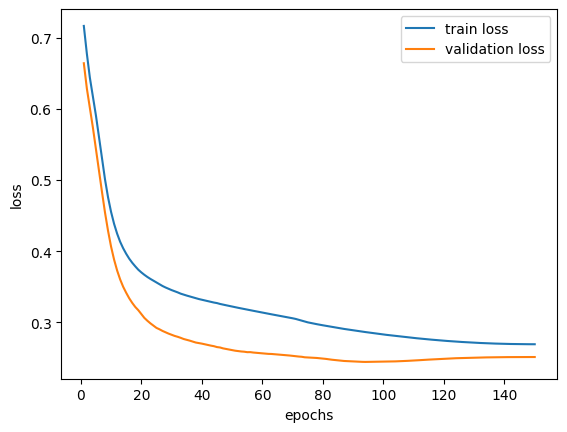

In [502]:
train_losses = history.history['loss']
val_losses = history.history['val_loss']
x_values = np.arange(1, len(train_losses)+1)
plt.plot(x_values, train_losses, label='train loss')
plt.plot(x_values, val_losses, label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [503]:
def performance_check(NN, Xtrain, ytrain):
    loss, accuracy = NN.evaluate(Xtrain, ytrain)
    text = '\033[92m'+'OK'+'\033[0m' if accuracy>=0.92 else '\033[91m'+'FAIL'+'\033[0m'
    return loss, accuracy, text 

performance = performance_check(model, X_train, y_train)
print('Accuracy:', performance[1], '->',performance[2])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9340 - loss: 0.2657 
Accuracy: 0.9340000152587891 -> OK


3. **Discussion**:
   - How can you make sure the results are reproduable?
      - by firstly using set_random_seed(1) and secondly using enable_op_determinism(). 1st, im setting the global seed to be the same for all pseudo random number generators. 2nd i am forcing the GPU into deterministic behaviour, which ensures the same input allways gives the same output. 

   - Visualize the network's architecture and decision boundary.

In [504]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (500, 10)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (500, 5)               │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (500, 1)               │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (376.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step


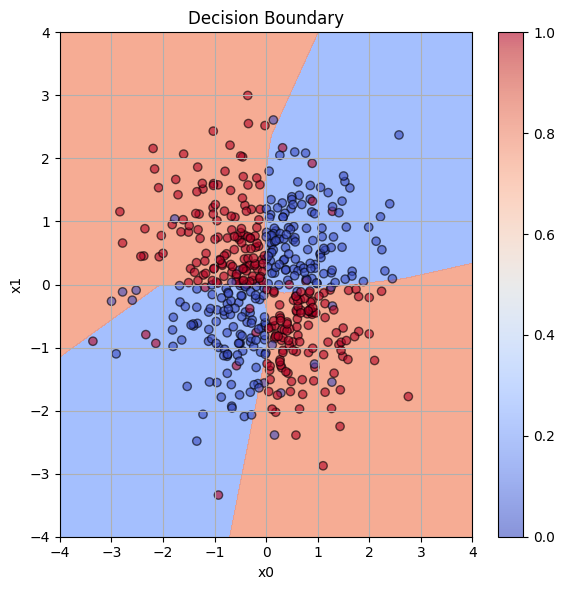

In [505]:
x0 = np.linspace(-4, 4, 200)
x1 = np.linspace(-4, 4, 200)
X0, X1 = np.meshgrid(x0, x1)
X = np.vstack([
        X0.ravel(), 
        X1.ravel()
    ]).T

y_pred = model.predict(X)
y_pred = y_pred.reshape(200, 200)

plt.figure(figsize=(6, 6))
plt.contourf(X0, X1, y_pred, cmap='coolwarm', alpha=0.8, levels=1)
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', edgecolors='k', alpha=0.6)
plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Decision Boundary')
plt.tight_layout()
plt.colorbar()
plt.show()

- Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - I chose Stochastic Gradient Descent for the task instead of Adam for this task. SGD is an optimizer that uses gradient descent based on a smaller batch of training data in order to update the model weights. Adam uses a more advanced technique to update the weights, where it retains memory of the direction and magnitude of the previous gradients in order to faster converge the learning rate. I found, with some trail and error, that Adam required fewer epochs to achieve an accuracy of 0.92 than SGD, however it generalized poorly compared to SGD. By plotting the validation vs training loss of the two models showed that Adam made both losses more zig-zaggy and the validation loss was substantially higher than the training loss. This could indicate too high learning rate as well as overfitting. When observing the desicion boundary it also showed a boudnary which is often seen with model overfitting. Adam is more sensitive to learning rate which is probably why the model overfits. Adam generally requires more careful hyperparameter tuning than SGD which i did not find to be needed for the task. this is why i ultimately chose SGD as my prefered optimizer for the task. 
   
- Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - the learning rate scheduling improved the performance of the neural network by a notisable amount. When plotting the training and test loss we can see that the loss is still decreasing when the number of epochs are met without learning rate scheduling. this shows that the model stil has a lot of improvement left on the table by simply increasing the number of epochs run. so learning rate scheduling did improve performance by bringing the learning rate to an optimal range faster.

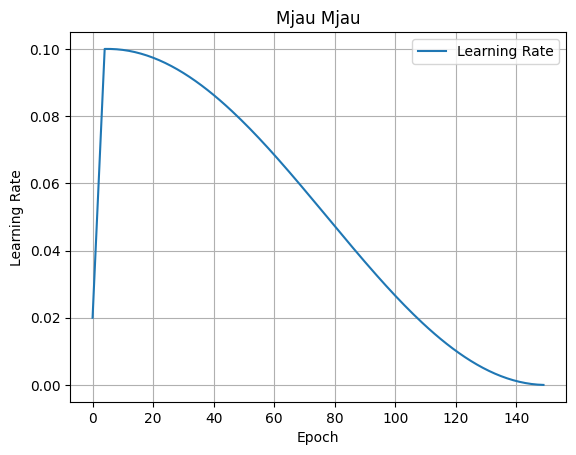

In [506]:
epochs = np.arange(EPOCHS)
lrs = [lr_scheduler(epoch) for epoch in epochs]

plt.plot(epochs, lrs, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Mjau Mjau')
plt.grid(True)
plt.legend()
plt.show()

In [507]:
SGDnoLrScheduling = Sequential()
SGDnoLrScheduling.add(Dense(10, activation='relu', name='layer1'))
SGDnoLrScheduling.add(Dense(5, activation='relu', name='layer2'))
SGDnoLrScheduling.add(Dense(1, activation='sigmoid', name='output'))

SGDnoLrScheduling(X_train)
SGDnoLrScheduling.compile(
    optimizer=SGD(learning_rate=0.1),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)
SnLrS = SGDnoLrScheduling.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_split=0.2,
    #callbacks=[LearningRateScheduler(lr_scheduler)],
    verbose=0
)

In [508]:
AdamLrScheduling = Sequential()
AdamLrScheduling.add(Dense(10, activation='relu', name='layer1'))
AdamLrScheduling.add(Dense(5, activation='relu', name='layer2'))
AdamLrScheduling.add(Dense(1, activation='sigmoid', name='output'))

AdamLrScheduling(X_train)
AdamLrScheduling.compile(
    optimizer=Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)
ALrS = AdamLrScheduling.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[LearningRateScheduler(lr_scheduler)],
    verbose=0
)

In [509]:
AdamNoLrScheduling = Sequential()
AdamNoLrScheduling.add(Dense(10, activation='relu', name='layer1'))
AdamNoLrScheduling.add(Dense(5, activation='relu', name='layer2'))
AdamNoLrScheduling.add(Dense(1, activation='sigmoid', name='output'))

AdamNoLrScheduling(X_train)
AdamNoLrScheduling.compile(
    optimizer=Adam(learning_rate=0.1),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)
AnLrS = AdamNoLrScheduling.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_split=0.2,
    #callbacks=[LearningRateScheduler(lr_scheduler)],
    verbose=0
)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step


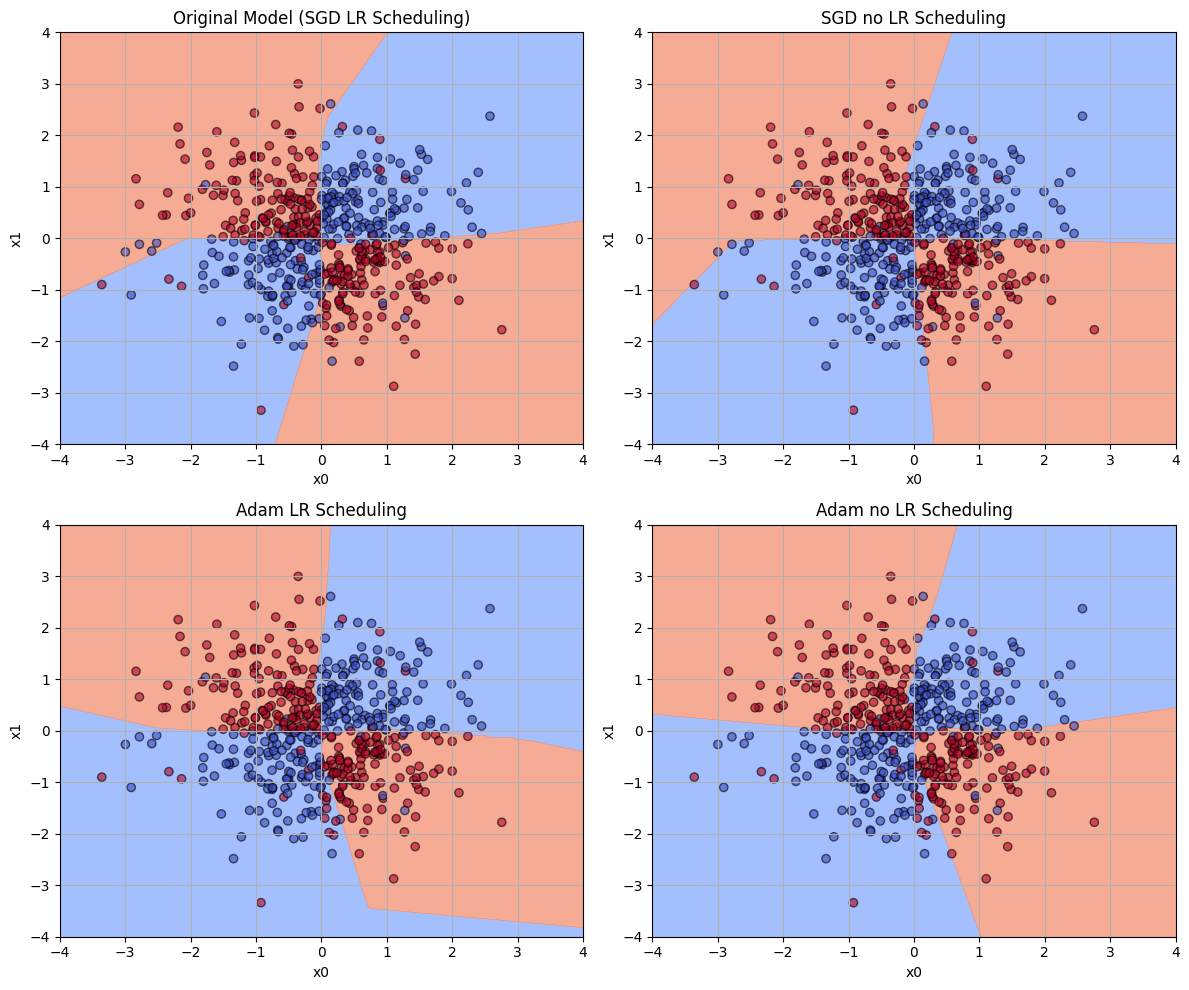

In [510]:
# Prepare the meshgrid
x0 = np.linspace(-4, 4, 200)
x1 = np.linspace(-4, 4, 200)
X0, X1 = np.meshgrid(x0, x1)
X = np.vstack([X0.ravel(), X1.ravel()]).T

# List of models and titles
models = [model, SGDnoLrScheduling, AdamLrScheduling, AdamNoLrScheduling]
titles = ['Original Model (SGD LR Scheduling)', 'SGD no LR Scheduling', 'Adam LR Scheduling', 'Adam no LR Scheduling']

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, mdl, title in zip(axes.ravel(), models, titles):
    y_pred = mdl.predict(X)
    y_pred = y_pred.reshape(200, 200)
    
    # Plot decision boundary
    contour = ax.contourf(X0, X1, y_pred, cmap='coolwarm', alpha=0.8, levels=1)
    
    # Plot training points
    ax.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', edgecolors='k', alpha=0.6)
    
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title(title)
    ax.grid(True)


plt.tight_layout()
plt.show()

In [511]:
performance = performance_check(model, X_train, y_train)
print('SGD LrS Accuracy:', performance[1], '->',performance[2],'\n')

performance = performance_check(SGDnoLrScheduling, X_train, y_train)
print('SGD no LrS Accuracy:', performance[1], '->',performance[2],'\n')

performance = performance_check(AdamLrScheduling, X_train, y_train)
print('Adam LrS Accuracy:', performance[1], '->',performance[2],'\n')

performance = performance_check(AdamNoLrScheduling, X_train, y_train)
print('Adam no LrS Accuracy:', performance[1], '->',performance[2],'\n')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9340 - loss: 0.2657 
SGD LrS Accuracy: 0.9340000152587891 -> OK 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9280 - loss: 0.2514 
SGD no LrS Accuracy: 0.9279999732971191 -> OK 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9300 - loss: 0.2085 
Adam LrS Accuracy: 0.9300000071525574 -> OK 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9140 - loss: 0.2750 
Adam no LrS Accuracy: 0.9139999747276306 -> FAIL 



- learning rate = 0.1:
    - SGD LrS Accuracy: 0.9340000152587891 -> OK 
    - SGD no LrS Accuracy: 0.9279999732971191 -> OK 
    - Adam LrS Accuracy: 0.9300000071525574 -> OK 
    - Adam no LrS Accuracy: 0.9139999747276306 -> FAIL
- learning rate = 0.01:
    - SGD LrS Accuracy: 0.8579999804496765 -> FAIL 
    - SGD no LrS Accuracy: 0.9139999747276306 -> FAIL 
    - Adam LrS Accuracy: 0.9380000233650208 -> OK 
    - Adam no LrS Accuracy: 0.949999988079071 -> OK
- learning rate = 0.001:
    - SGD LrS Accuracy: 0.7279999852180481 -> FAIL 
    - SGD no LrS Accuracy: 0.7099999785423279 -> FAIL 
    - Adam LrS Accuracy: 0.9340000152587891 -> OK 
    - Adam no LrS Accuracy: 0.9340000152587891 -> OK

- Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.
    - as seen above comparing the different optimizers with different initial learning rates show vastly different results. Stochastic Gradient Descent is more accurate the higher the learning rate is, while Adam is more accurate with lower learning rates. the Average best learning rate was with a learning rate of 0.01 for the different models, though SGD only passed the test with a learning rate of 0.1. further, non-documented, results showed SGD passing the threshold of 0.92 accuracy with a learning rate of 0.01 when the number of epochs was higher. The all around best optimizer for this task would be Adam, which makes sense since it performes better on smaller datasets compared to SGD. although SGD could perform great on smaller datasets, it needs a higher learning rate to not risk falling into a local minima instead of the global minima. Normally this is done with giving SGD momentum, which i did not do in this task, but would be the more propper implementation of the two. further distinction could be done by changing the batch size as well as the number of epochs each model should run for, but i found the included parameters displayed the distincy differences between the two optimizers. 

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

**Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
      - I solved the task with both t-SNE and UMAP separately. Since both of them capture nonlinear relationships i wanted to see if i could reduce the dimansions of the dataset in a way that allowed the task to be solved when applying the same clustering approach afterwards. I also tried to use PCA to reduce the dimensions, but it struggled since PCA captures linear relationships. when plotting the different outcomes of the dimensionality reductions i found that PCA gave an output with no real structure, which meant that clustering algorithms would struggle to find relationships between them. t-SNE yielded better results, with a clearer separation between groups of points where you could see snake like formations in the data. Lastly, dimensionality reduction with UMAP resulted in clear and distinct groups of points. From here on i chose the features with 3 components (3d) instead of 2 because i wanted to retain as much information from the true dataset as possible. 
      - After the clustering algorithm + kaggle submission is became clear that there were 4 distinct clusters. this is reflected in the split of UMAP 2d, however it is not given that these were the correct clusters. Further, i did not know before finnishing the clustering algorithm that there were 4 clusters, which made it risky to go for the 2d reduction. That being said, in hindsight, it would be more elegant to chose 2d UMAP reduction :) 

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
      - I chose DBSCAN for the task since there was an unknown number of clusters. furthermore, when plotting the data it was shown that data was not centered around a centroid nor being circle-esque. this excludes kmeans as a clustering algorithm that would work well on the dataset. DBSCAN is a clustering algorithm that discovers the number of clusters automatically. it also can assign single points as outliers, which isnt a feature in kmeans. Kmeans calculates cluster affiliation by how close points are to the centroid, whilst DBSCAN calculates cluters based on the distance to the next neighbour.

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
      - They are all pictures, just rotated around its center! since the different clusters each represented the same picture, just rotated differently, the pixels would correlate to eachother. since the images were rotated it would be difficult for PCA to find the relationships, but UMAP and t-SNE work better since they capture nonlinear relationship.

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
      - the server locations were Trondheim Spektrum, IKEA Leangen, Pirbadet and Studenter samfundet. I sorted the data based on the column names so col_0 is first then col_1 and so on. then i reshaped each row to a 128*128 matrix, then i plotted all of them. once plotted i looked through each image for the best one, since there were multiple duplicates which were rotated differently. For the places which i did not recognize, i used google maps :)

   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
# data

In [3]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


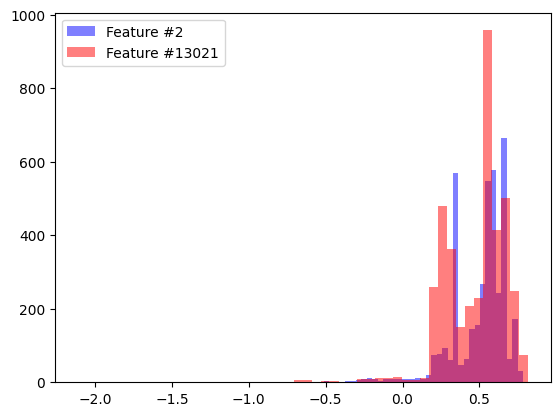

In [4]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [5]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [6]:
features = data.drop(columns='ID')
features

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,0.276428,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,0.596893,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,0.579825,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,0.470762,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,0.711071,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,0.384257,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,0.251329,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import MiniBatchKMeans, DBSCAN

c:\Users\Eirik\miniconda3\envs\tdt4172\Lib\site-packages\umap\__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


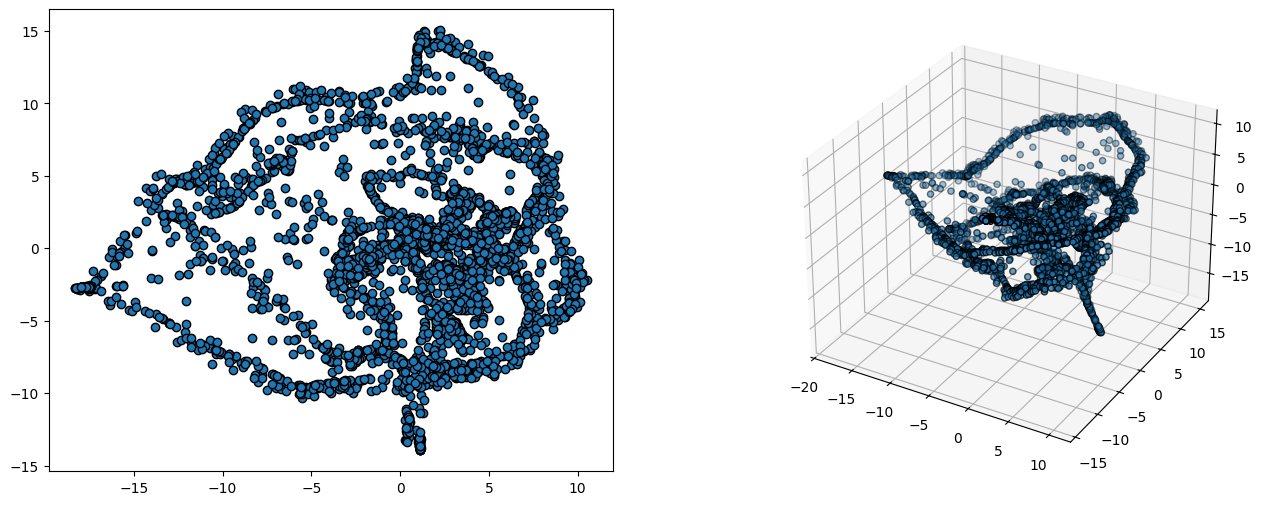

In [8]:
pca_2d = PCA(n_components=2).fit_transform(features)
pca_3d = PCA(n_components=3).fit_transform(features)

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(pca_2d[:, 0], pca_2d[:, 1], edgecolors='k')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2]
scatter = ax2.scatter(x, y, z, edgecolors='k')

plt.show()

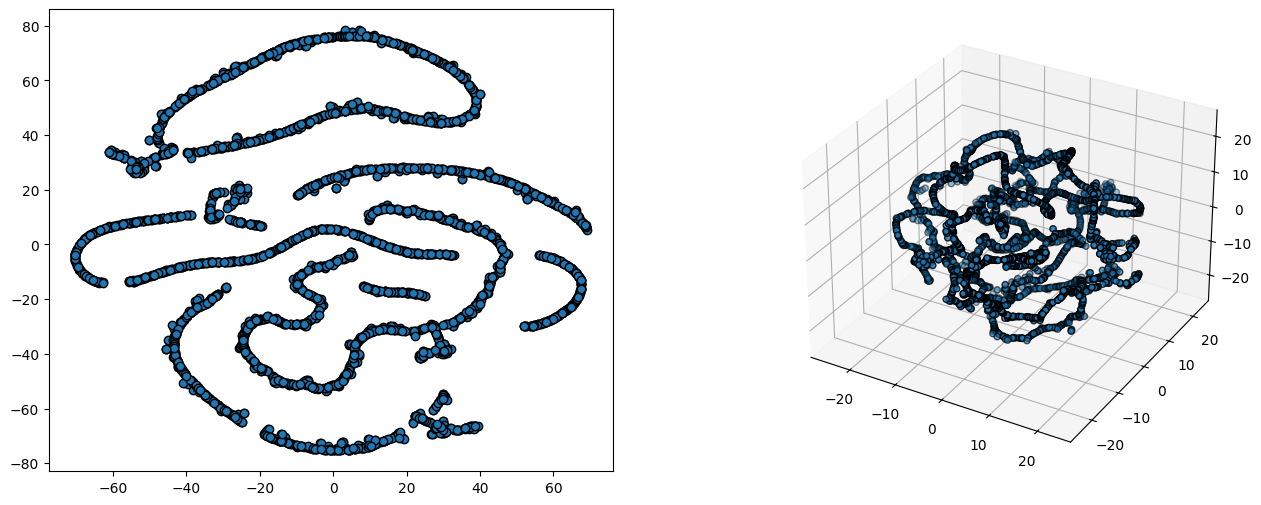

In [10]:
tsne_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
tsne_2d_features = tsne_2d.fit_transform(features)
x2, y2 = tsne_2d_features[:, 0], tsne_2d_features[:, 1]

tsne_3d = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, random_state=42)
tsne_3d_features = tsne_3d.fit_transform(features)
x3, y3, z3 = tsne_3d_features[:, 0], tsne_3d_features[:, 1], tsne_3d_features[:, 2]

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x2, y2, edgecolors='k')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(x3, y3, z3, edgecolors='k')

plt.show()

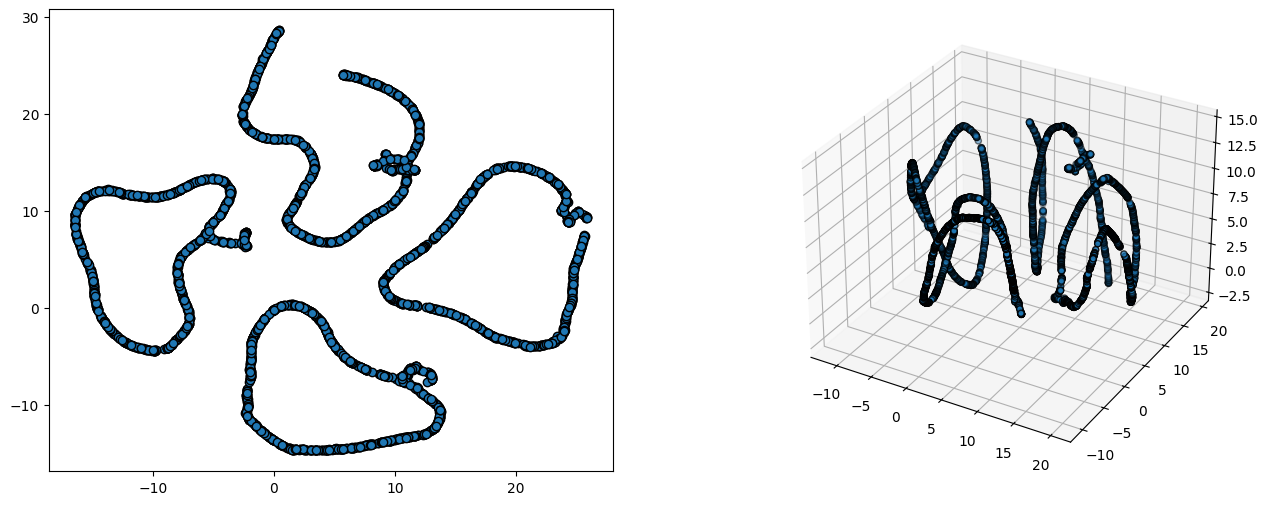

In [11]:

umap_2d = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.3)
umap_2d_features = umap_2d.fit_transform(features)
x2, y2 = umap_2d_features[:, 0], umap_2d_features[:, 1]

umap_3d = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.3)
umap_3d_features = umap_3d.fit_transform(features)
x3, y3, z3 = umap_3d_features[:, 0], umap_3d_features[:, 1], umap_3d_features[:, 2]

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x2, y2, edgecolors='k')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(x3, y3, z3, edgecolors='k')

plt.show()

In [12]:
def plot_clusters(reduced_features, clusters):
    x, y, z = reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=clusters, edgecolors='k')
    plt.show()

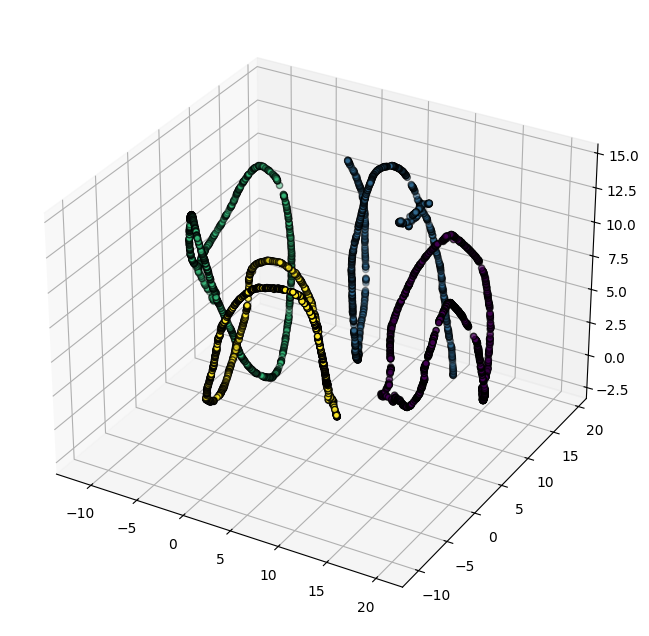

In [13]:
dbscan = DBSCAN(eps=5, min_samples=8)
clusters_umap = dbscan.fit_predict(umap_3d_features)
plot_clusters(umap_3d_features, clusters_umap)


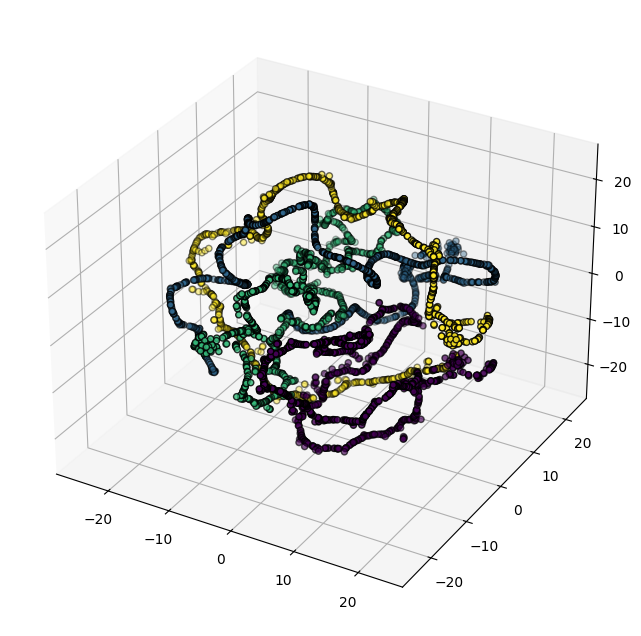

In [14]:
dbscan = DBSCAN(eps=5, min_samples=8)
clusters_tsne = dbscan.fit_predict(umap_3d_features)
plot_clusters(tsne_3d_features, clusters_tsne)

In [15]:
submission = pd.DataFrame({
    'ID': data['ID'].values,
    'cluster': clusters_umap
})
submission.to_csv(
    'submission.csv', 
    index=False
)

In [16]:
data = pd.read_csv('unsupervised_data.csv')
data = data[
    sorted(
        data.columns, 
        key=lambda x: int(x.split('_')[1])
    )
]
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_16374,col_16375,col_16376,col_16377,col_16378,col_16379,col_16380,col_16381,col_16382,col_16383
0,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,...,0.475593,0.532497,0.589401,0.627337,0.655790,0.665273,0.674758,0.665273,0.655790,0.646305
1,-0.144320,0.383794,0.633953,0.578363,0.587628,0.587628,0.587628,0.587628,0.587628,0.587628,...,0.587628,0.587628,0.587628,0.587628,0.578363,0.457915,0.068779,0.087309,0.494976,0.457915
2,0.590203,0.590203,0.590203,0.590203,0.590203,0.367673,0.345897,0.367673,0.367673,0.367673,...,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203
3,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,...,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296
4,0.672652,0.672655,0.672929,0.677057,0.688611,0.646499,0.409348,0.064447,-0.087393,-0.085845,...,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,0.340739,...,0.769519,0.759781,0.759779,0.759779,0.759769,0.740269,0.691551,0.642845,0.633110,0.662325
3996,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,0.384257,...,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221,0.675221
3997,0.651135,0.660433,0.623242,0.483774,0.335009,0.083968,0.279222,0.604646,0.641837,0.641837,...,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135,0.651135
3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.430439,0.041757,0.555533,...,0.555533,0.555533,0.555533,0.269605,-0.065465,-0.011854,-0.226299,-0.186091,-0.306716,0.135577


In [17]:
# 16384 = 128 * 128... hmmmmmmm
mod_data = data.to_numpy()
mod_data = mod_data.reshape(-1,128,128)
len(set(clusters_umap)) # 4 distinct clusters. maybe 4 locations? 

4

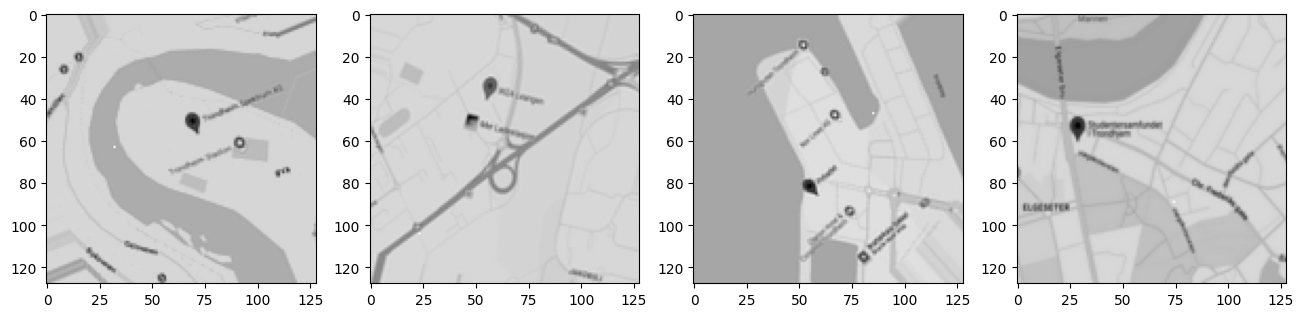

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(16, 16))
axs = axs.ravel()

images_to_print = {
    9 : 'a',
    11 : 'b',
    13 : 'c',
    24 : 'd',
}
for i,idx in enumerate(images_to_print):
    axs[i].imshow(
        mod_data[idx], 
        cmap='gray'
    )
plt.show()


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [8]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [9]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [10]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [11]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)